# 8. 신경망, 딥러닝의 응용(필기체 숫자 인식)

## 8.1 MNIST 데이터베이스

In [1]:
# MNIST 필기체 숫자 데이터셋 사용
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test,) = mnist.load_data()
# train데이터 60000개, test데이터 10000개.

11501568/11490434 [==============================] - 0s 0us/step


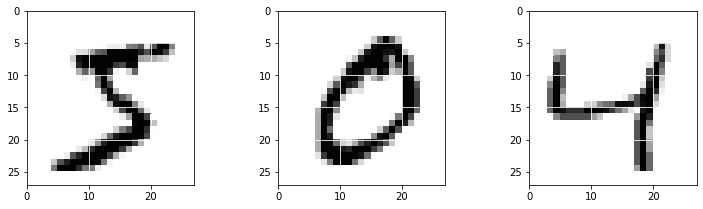

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
  plt.subplot(1,3, id+1)
  img = x_train[id, :, :] # 명령으로 id번째 이미지 꺼냄.
  plt.pcolor(255 - img)
  # plt.text(24.5, 26, "%d % y_train[id], color='cornflowerblue", fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')

plt.show()

## 8.2 2층 피드 포워드 네트워크 모델[링크 텍스트](https://)

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)  #784x28x28의 배열을 60000x784의 배열로 변환
x_train = x_train.astype('float32') # int형을 float형으로 변환
x_train = x_train / 255 

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # y_train 요소는 0-9정수
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes) # x_train 요소는 0-9정수

In [4]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential() 
model.add( Dense(16, input_dim=784, activation='sigmoid') ) # 784차원 입력을 갖는 16개의 중간층
model.add( Dense(10, activation='softmax') ) # 10개의 출력층 정의
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # Adam으로 설정

In [5]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, # verbose=1로 설정할여 매 시기의 학습 평가치 표시
                    validation_data=(x_test, y_test)) # '확률적 경사 하강법' 사용. 1회 갱신에 사용하는 데이터 크기는 배치크기로 정의
                    # batch_size =1000 1000개의 데이터셋에서 기울기가 계산도니 매개 변수가 갱신
                    # 60회의 매개 변수 갱신 진행, 이를 1epoch. 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 2.0145 - accuracy: 0.3907 - val_loss: 1.7267 - val_accuracy: 0.6057
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.5649 - accuracy: 0.6967 - val_loss: 1.4008 - val_accuracy: 0.7715
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 1.2890 - accuracy: 0.7933 - val_loss: 1.1613 - val_accuracy: 0.8289
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 1.0797 - accuracy: 0.8317 - val_loss: 0.9769 - val_accuracy: 0.8533
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.9187 - accuracy: 0.8521 - val_loss: 0.8357 - val_accuracy: 0.8672
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.7950 - accuracy: 0.8661 - val_loss: 0.7280 - val_accuracy: 0.8752
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6999 - accuracy: 0.8760 - val_loss: 0.6453 - val_accuracy: 0.8827
Epoch 8/10
60/60 [==

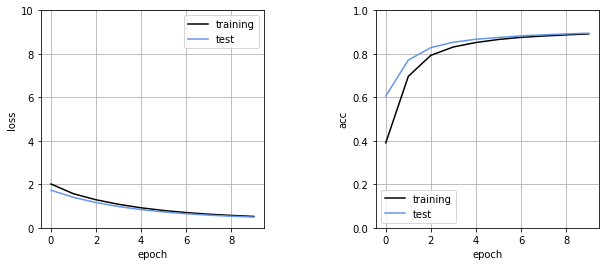

In [6]:
# 오버 피팅이 일어나지 않았는지 확인 위해, 테스트 데이터 오차의 시간 변화 플롯
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

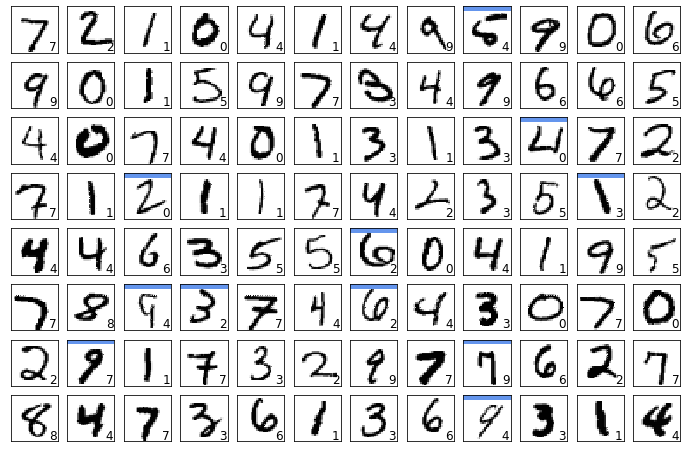

In [7]:
# 실제 테스트 데이터 입력시 모델 출력
def show_prediction():
  n_show = 96
  y = model.predict(x_test) # x_test 전체에 대한 모델의 출력 y 얻음.
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
  
# 메인 
show_prediction()
plt.show()

## 8.3 ReLU 활성화 함수

In [8]:
# 중간층의 활성화 함수 ReLU함수로 변경
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) #(A)
model.add(Dense(10, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 14ms/step - loss: 1.4530 - accuracy: 0.6133 - val_loss: 0.8230 - val_accuracy: 0.8331
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6346 - accuracy: 0.8557 - val_loss: 0.4794 - val_accuracy: 0.8870
Epoch 3/10
60/60 [==============================] - 1s 11ms/step - loss: 0.4385 - accuracy: 0.8881 - val_loss: 0.3797 - val_accuracy: 0.9032
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3686 - accuracy: 0.9019 - val_loss: 0.3349 - val_accuracy: 0.9103
Epoch 5/10
60/60 [==============================] - 1s 8ms/step - loss: 0.3324 - accuracy: 0.9099 - val_loss: 0.3096 - val_accuracy: 0.9166
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3101 - accuracy: 0.9157 - val_loss: 0.2918 - val_accuracy: 0.9195
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2942 - accuracy: 0.9190 - val_loss: 0.2810 - val_accuracy: 0.9219
Epoch 8/10
60/60 

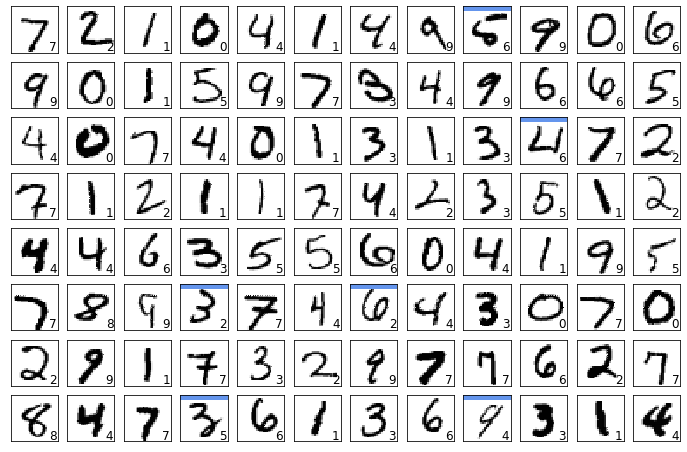

In [9]:
# 테스트 데이터 인식의 예 확인
show_prediction()
plt.show()

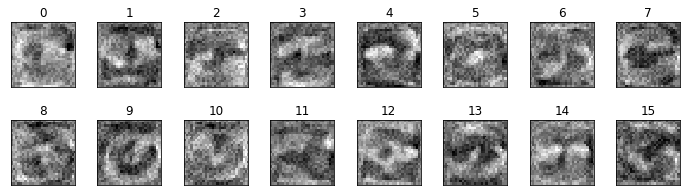

In [10]:
# 1층째의 가중치 시각화

w = model.layers[0].get_weights()[0] # 네트워크 모델의 중간층 가중치 매개 변수 얻음
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()

네트워크 구조가 전결합형으로 모든 입력 성분은 대등한 관계를 가져 입력 순서를 바꾸더라도 전 데이터에서 규칙에 따르면 동일하게 학습

## 8.4 공간 필터

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

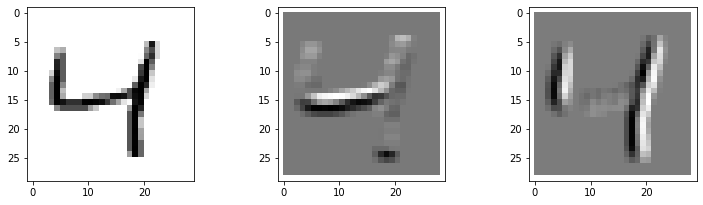

In [13]:
# 가로 및 세로 엣지를 강조하는 2개의 필터를 훈련 데이터의 2번째인 4에 적용해보기
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1],[1,1,1],[-2,-2,-2]],dtype = float)
myfil2 = np.array([[-2,1,1],[-2,1,1],[-2,1,1]],dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h -3):
  for iw in range(img_w -3):
    img_part = x_img[ih:ih + 3, iw:iw+3 ]
    out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
    out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# --표시
plt.figure(1,figsize = (12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1-x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()


모든 요소를 합하면 0이 되도록 디자인. 공간 구조가 없는 균일한 부분은 0으로 변환, 필터에서 추출하려는 구조가 존재할 경우에는 0이상의 값으로 변환되어 0을 감지 레벨의 기준으로 세울 수 있어 편리

## 8.5 합성곱 신경망

In [14]:
# CNN을 케라스로 구현
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8,(3,3),padding='same',input_shape=(28,28,1),activation='relu')) #3x3필터를 8개 사용
model.add(Flatten()) # 합성곱층의 출력은 4차원으로 그 크기는(배치 수, 필터 수, 출력 이미지의 세로폭, 출력 이미지의 가로폭)
      # 이것을 다음 출력층(Dens층)에 넣으려면 (배치 수, 필터 수x출력 이미지 세로폭x출력 이미지 가로폭)의 2차원으로 해야함.
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, 
                    epochs=20,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:',score[1])
print("Computation time:{0:.3f}sec".format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 10s 162ms/step - loss: 0.9430 - accuracy: 0.7942 - val_loss: 0.3748 - val_accuracy: 0.8981
Epoch 2/20
60/60 [==============================] - 9s 158ms/step - loss: 0.3342 - accuracy: 0.9058 - val_loss: 0.2819 - val_accuracy: 0.9217
Epoch 3/20
60/60 [==============================] - 9s 156ms/step - loss: 0.2677 - accuracy: 0.9247 - val_loss: 0.2377 - val_accuracy: 0.9330
Epoch 4/20
60/60 [==============================] - 9s 158ms/step - loss: 0.2260 - accuracy: 0.9367 - val_loss: 0.2032 - val_accuracy: 0.9440
Epoch 5/20
60/60 [==============================] - 10s 159ms/step - loss: 0.1930 - accuracy: 0.9460 - val_loss: 0.1761 - val_accuracy: 0.9502
Epoch 6/20
60/60 [==============================] - 9s 157ms/step - loss: 0.1669 - accuracy: 0.9537 - val_loss: 0.1558 - val_accuracy: 0.9547
Epoch 7/20
60/60 [==============================] - 10s 159ms/step - loss: 0.1464 - accuracy: 0.9597 - val_loss: 0.1393 - val_accuracy: 0.9601
Epo

In [15]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test) # x_test 전체에 대한 모델의 출력 y 얻음.
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
  

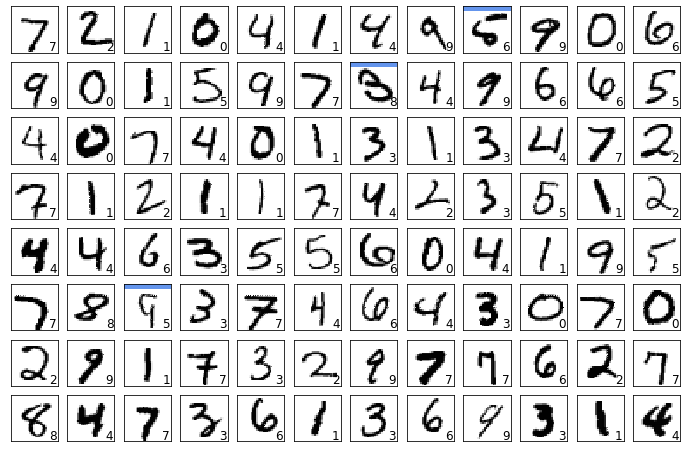

In [16]:
show_prediction()
plt.show()

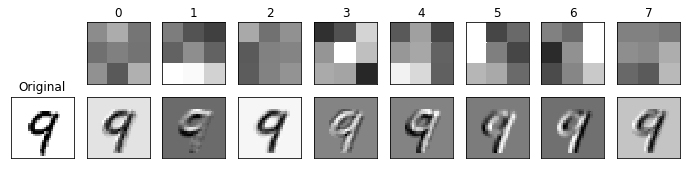

In [17]:
#학습에서 획득한 8장의 필터
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28

x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] #(A)
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
  plt.subplot(2, 9, i + 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3,3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0,3)
  plt.ylim(3,0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
  plt.subplot(2,9,i + 11)
  out_img = np.zeros_like(x_img)
  
  #필터 처리
  for ih in range(img_h - 3):
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()

테스트 데이터 x_test에서 12번째 '9'이미지를 적용한 예 표시. 합성곱 네트워크는 필기체 숫자뿐만 아니라 문자 인식이나 화상 인식 등에서도 힘 발휘.

## 8.8 MNIST 인식 네트워크 모델

In [18]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(A)
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(B)
model.add(Dropout(0.25)) #(C)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) #(D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss:", score[0])
print("test accu:", score[1])
print("computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 62s 1s/step - loss: 0.7280 - accuracy: 0.7761 - val_loss: 0.1430 - val_accuracy: 0.9573
Epoch 2/20
60/60 [==============================] - 63s 1s/step - loss: 0.1460 - accuracy: 0.9555 - val_loss: 0.0697 - val_accuracy: 0.9779
Epoch 3/20
60/60 [==============================] - 61s 1s/step - loss: 0.0978 - accuracy: 0.9698 - val_loss: 0.0505 - val_accuracy: 0.9837
Epoch 4/20
60/60 [==============================] - 62s 1s/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0382 - val_accuracy: 0.9867
Epoch 5/20
60/60 [==============================] - 62s 1s/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0370 - val_accuracy: 0.9882
Epoch 6/20
60/60 [==============================] - 62s 1s/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 7/20
60/60 [==============================] - 62s 1s/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0275 - val_accuracy: 0.9902
Epoch 8/20
60/60 [==